In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors

import klcalculator
import Utils

In [2]:
#data input
features = ['INMATEID', 'ADMITTED_DT', 'DISCHARGED_DT', 'RACE', 'GENDER', 'INMATE_STATUS_CODE', 'TOP_CHARGE']
inmate = pd.read_csv('Inmate_Admissions.csv')[features]
pd.set_option('display.expand_frame_repr', True)

inmate.head(10)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,10001993,01/22/2018 06:32:26 PM,NaN,BLACK,M,DE,220.39
1,70983,1/02/2018 19:05,1/10/2018 20:17,UNKNOWN,M,DE,NaN
2,2744,01/18/2018 05:40:04 PM,NaN,UNKNOWN,M,DE,140.2
3,20165517,1/09/2018 12:18,NaN,UNKNOWN,M,DE,110-120.05
4,20078557,01/15/2018 11:21:00 AM,NaN,BLACK,M,DE,155.25
5,20044863,1/07/2018 17:08,NaN,BLACK,M,DEP,120
6,111248,1/03/2018 16:17,NaN,BLACK,M,CS,215.5
7,20191524,01/25/2018 01:33:00 AM,01/29/2018 03:43:00 PM,BLACK,M,DE,NaN
8,20190871,1/07/2018 12:20,1/08/2018 0:52,UNKNOWN,M,DE,NaN
9,20129999,01/18/2018 11:09:36 AM,NaN,BLACK,M,DE,220.39


In [3]:
#pre-processing

inmate['ADMITTED_DT'] = pd.to_datetime(inmate['ADMITTED_DT'])
#inmate['ADMITTED_DT'] = inmate['ADMITTED_DT'].dt.strftime('%m/%Y')
inmate['DISCHARGED_DT'] = pd.to_datetime(inmate['DISCHARGED_DT'])

inmate['GENDER'] = inmate['GENDER'].str.strip().map({'M': 1, 'F': 2})
inmate['DISCHARGED_DT'].fillna(dt.datetime.today(), inplace=True)
inmate['TOP_CHARGE'].fillna("0", inplace=True)

uni_race_len = len(inmate['RACE'].unique())
match_dic = inmate['RACE'].unique()
for i in range(uni_race_len):
    inmate['RACE'] = inmate['RACE'].replace(match_dic[i],i+1)
    
uni_status_len = len(inmate['INMATE_STATUS_CODE'].unique())
match_dic = inmate['INMATE_STATUS_CODE'].unique()
for i in range(uni_status_len):
    inmate['INMATE_STATUS_CODE'] = inmate['INMATE_STATUS_CODE'].replace(match_dic[i],i+1)
    
uni_charge_len = len(inmate['TOP_CHARGE'].unique())
match_dic = inmate['TOP_CHARGE'].unique()
for i in range(uni_charge_len):
    inmate['TOP_CHARGE'] = inmate['TOP_CHARGE'].replace(match_dic[i],i+1)

d0 = min(inmate['ADMITTED_DT'])
    
inmate['ADMITTED_DT'] = inmate['ADMITTED_DT'].apply(lambda x: (x - d0).days)
inmate['DISCHARGED_DT'] = inmate['DISCHARGED_DT'].apply(lambda x: (x - d0).days)

inmate.head(10)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,10001993,716,1257,1,1,1,1
1,70983,696,704,2,1,1,2
2,2744,712,1257,2,1,1,3
3,20165517,703,1257,2,1,1,4
4,20078557,709,1257,1,1,1,5
5,20044863,701,1257,1,1,2,6
6,111248,697,1257,1,1,3,7
7,20191524,718,723,1,1,1,2
8,20190871,701,701,2,1,1,2
9,20129999,712,1257,1,1,1,1


In [4]:
Utils.summarise_data(inmate)

,Min,Q1,Avg,Med,Q3,Max
INMATEID,2744,137497.0,13618696.02,20092875.5,20188248.00,20191682
ADMITTED_DT,0,701.0,702.20,708.0,716.00,725
DISCHARGED_DT,698,709.5,967.54,724.5,1257.00,1257
RACE,1,1.0,1.52,1.5,2.00,3
GENDER,1,1.0,1.09,1.0,1.00,2
INMATE_STATUS_CODE,1,1.0,1.42,1.0,1.00,6
TOP_CHARGE,1,2.0,8.11,2.0,13.25,31


In [5]:
#show PIF inmate data
dataset = list(zip(*(inmate[fn].tolist() for fn in features)))

original_risks = klcalculator.find_risks_for_records(dataset)
klcalculator.display_risks(features, original_risks)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,6.64386,4.32193,1.08927,1,0.136062,0.268817,5.05889
1,6.64386,5.05889,4.64386,1.05889,0.136062,0.268817,1.02915
2,6.64386,3.47393,1.08927,1.05889,0.136062,0.268817,4.32193
3,6.64386,5.05889,1.08927,1.05889,0.136062,0.268817,6.64386
4,6.64386,6.64386,1.08927,1,0.136062,0.268817,5.05889
5,6.64386,4.64386,1.08927,1,0.136062,5.05889,5.05889
6,6.64386,4.32193,1.08927,1,0.136062,3.47393,5.05889
7,6.64386,5.64386,5.64386,1,0.136062,0.268817,1.02915
8,6.64386,4.64386,5.64386,1.05889,0.136062,0.268817,1.02915
9,6.64386,3.47393,1.08927,1,0.136062,0.268817,5.05889


In [6]:
#summarise inmate risk
Utils.get_risk_scores(pd.DataFrame(original_risks, columns=features))

,Min,Q1,Avg,Med,Q3,Max
INMATEID,5.64386,6.64386,6.62386,6.64386,6.64386,6.64386
ADMITTED_DT,3.47393,4.32193,4.65279,4.64386,4.64386,6.64386
DISCHARGED_DT,1.08927,1.08927,3.36791,4.64386,5.05889,6.64386
RACE,1,1,1.12115,1.02945,1.05889,5.64386
GENDER,0.136062,0.136062,0.43647,0.136062,0.136062,3.47393
INMATE_STATUS_CODE,0.268817,0.268817,0.979731,0.268817,0.268817,6.64386
TOP_CHARGE,1.02915,1.02915,3.39881,4.32193,5.64386,6.64386


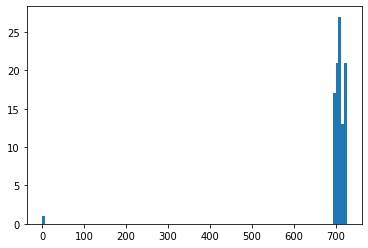

In [7]:
#show plot admitted date (in days)

tmp_adm = inmate.ADMITTED_DT.values
plt.hist(tmp_adm, bins='auto')
plt.show()

In [8]:
#add Gaussian noise to admitted date variable

g_noise = np.random.normal(np.mean(inmate.ADMITTED_DT),10,len(inmate.ADMITTED_DT))
new_adm = np.add(tmp_adm, g_noise)

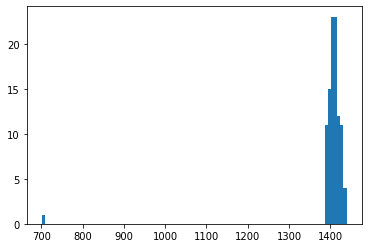

In [9]:
#show change in plot

plt.hist(new_adm, bins='auto')
plt.show()

In [10]:
#update inmate data

inmate.ADMITTED_DT = new_adm
inmate.head(10)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,10001993,1428.672449,1257,1,1,1,1
1,70983,1391.741737,704,2,1,1,2
2,2744,1415.418411,1257,2,1,1,3
3,20165517,1408.759082,1257,2,1,1,4
4,20078557,1404.677106,1257,1,1,1,5
5,20044863,1410.797247,1257,1,1,2,6
6,111248,1409.706761,1257,1,1,3,7
7,20191524,1435.910575,723,1,1,1,2
8,20190871,1407.683189,701,2,1,1,2
9,20129999,1410.397455,1257,1,1,1,1


In [11]:
#show change to risk scores
dataset = list(zip(*(inmate[fn].tolist() for fn in features)))

original_risks = klcalculator.find_risks_for_records(dataset)
klcalculator.display_risks(features, original_risks)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,6.64386,6.64386,1.08927,1,0.136062,0.268817,5.05889
1,6.64386,6.64386,4.64386,1.05889,0.136062,0.268817,1.02915
2,6.64386,6.64386,1.08927,1.05889,0.136062,0.268817,4.32193
3,6.64386,6.64386,1.08927,1.05889,0.136062,0.268817,6.64386
4,6.64386,6.64386,1.08927,1,0.136062,0.268817,5.05889
5,6.64386,6.64386,1.08927,1,0.136062,5.05889,5.05889
6,6.64386,6.64386,1.08927,1,0.136062,3.47393,5.05889
7,6.64386,6.64386,5.64386,1,0.136062,0.268817,1.02915
8,6.64386,6.64386,5.64386,1.05889,0.136062,0.268817,1.02915
9,6.64386,6.64386,1.08927,1,0.136062,0.268817,5.05889


In [12]:
#summarise change to risk scores
Utils.get_risk_scores(pd.DataFrame(original_risks, columns=features))

,Min,Q1,Avg,Med,Q3,Max
INMATEID,6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
ADMITTED_DT,6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
DISCHARGED_DT,1.08927,1.08927,3.36791,4.64386,5.05889,6.64386
RACE,1,1,1.12115,1.02945,1.05889,5.64386
GENDER,0.136062,0.136062,0.43647,0.136062,0.136062,3.47393
INMATE_STATUS_CODE,0.268817,0.268817,0.979731,0.268817,0.268817,6.64386
TOP_CHARGE,1.02915,1.02915,3.39881,4.32193,5.64386,6.64386


In [13]:
#aggregate admitted date data by removing last 2 digits and display
dataset = klcalculator.aggregate(
        dataset,
        {
          1: lambda ADMITTED_DT: ADMITTED_DT//100
        })

dst = pd.DataFrame(dataset, columns=features)
dst[:20]

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,10001993,14.0,1257,1,1,1,1
1,70983,13.0,704,2,1,1,2
2,2744,14.0,1257,2,1,1,3
3,20165517,14.0,1257,2,1,1,4
4,20078557,14.0,1257,1,1,1,5
5,20044863,14.0,1257,1,1,2,6
6,111248,14.0,1257,1,1,3,7
7,20191524,14.0,723,1,1,1,2
8,20190871,14.0,701,2,1,1,2
9,20129999,14.0,1257,1,1,1,1


In [14]:
#summarise data set
Utils.summarise_data(dst)

,Min,Q1,Avg,Med,Q3,Max
INMATEID,2744.0,137497.0,13618696.02,20092875.5,20188248.00,20191682.0
ADMITTED_DT,7.0,14.0,13.72,14.0,14.00,14.0
DISCHARGED_DT,698.0,709.5,967.54,724.5,1257.00,1257.0
RACE,1.0,1.0,1.52,1.5,2.00,3.0
GENDER,1.0,1.0,1.09,1.0,1.00,2.0
INMATE_STATUS_CODE,1.0,1.0,1.42,1.0,1.00,6.0
TOP_CHARGE,1.0,2.0,8.11,2.0,13.25,31.0


In [15]:
#display updated risk scores
original_risks = klcalculator.find_risks_for_records(dataset)
klcalculator.display_risks(features, original_risks)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,5.64386,0.358454,1.08927,1,0.136062,0.268817,5.05889
1,6.64386,2.25154,4.64386,1.05889,0.136062,0.268817,1.02915
2,4.64386,0.358454,1.08927,1.05889,0.136062,0.268817,4.32193
3,6.64386,0.358454,1.08927,1.05889,0.136062,0.268817,6.64386
4,5.64386,0.358454,1.08927,1,0.136062,0.268817,5.05889
5,6.64386,0.358454,1.08927,1,0.136062,5.05889,5.05889
6,6.64386,0.358454,1.08927,1,0.136062,3.47393,5.05889
7,6.64386,0.358454,5.64386,1,0.136062,0.268817,1.02915
8,6.64386,0.358454,5.64386,1.05889,0.136062,0.268817,1.02915
9,5.64386,0.358454,1.08927,1,0.136062,0.268817,5.05889


In [16]:
#summarise updated risk scores
dst_risk = pd.DataFrame(original_risks, columns=features)
Utils.get_risk_scores(dst_risk)

,Min,Q1,Avg,Med,Q3,Max
INMATEID,4.64386,5.64386,6.30386,6.64386,6.64386,6.64386
ADMITTED_DT,0.358454,0.358454,0.818856,0.358454,0.358454,6.64386
DISCHARGED_DT,1.08927,1.08927,3.36791,4.64386,5.05889,6.64386
RACE,1,1,1.12115,1.02945,1.05889,5.64386
GENDER,0.136062,0.136062,0.43647,0.136062,0.136062,3.47393
INMATE_STATUS_CODE,0.268817,0.268817,0.979731,0.268817,0.268817,6.64386
TOP_CHARGE,1.02915,1.02915,3.39881,4.32193,5.64386,6.64386


In [17]:
#show combined feature risks to aggregated data
Utils.get_combined_feature_risks(dst)

,Min,Q1,Mean,Med,Q3,Max
"('INMATEID', 'ADMITTED_DT')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'DISCHARGED_DT')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'RACE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'GENDER')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'INMATE_STATUS_CODE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'TOP_CHARGE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('ADMITTED_DT', 'DISCHARGED_DT')",1.2863,1.2863,3.90852,4.85137,5.64386,6.64386
"('ADMITTED_DT', 'RACE')",1.35845,1.35845,1.92395,1.39593,1.39593,6.64386
"('ADMITTED_DT', 'GENDER')",0.535332,0.535332,1.22129,0.535332,2.25154,6.64386
"('ADMITTED_DT', 'INMATE_STATUS_CODE')",0.556393,0.556393,1.68225,0.556393,2.73697,6.64386


In [18]:
#compare combined feature risks to inmate data (noise but no aggregation)
Utils.get_combined_feature_risks(inmate)

,Min,Q1,Mean,Med,Q3,Max
"('INMATEID', 'ADMITTED_DT')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'DISCHARGED_DT')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'RACE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'GENDER')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'INMATE_STATUS_CODE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('INMATEID', 'TOP_CHARGE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('ADMITTED_DT', 'DISCHARGED_DT')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('ADMITTED_DT', 'RACE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('ADMITTED_DT', 'GENDER')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386
"('ADMITTED_DT', 'INMATE_STATUS_CODE')",6.64386,6.64386,6.64386,6.64386,6.64386,6.64386


Getting risks
Getting heatmap
Processing INMATEID
Processing ADMITTED_DT
Processing DISCHARGED_DT
Processing RACE
Processing GENDER
Processing INMATE_STATUS_CODE
Processing TOP_CHARGE
Processing column 0
Processing column 1
Processing column 2
Processing column 3
Processing column 4
Processing column 5
Processing column 6


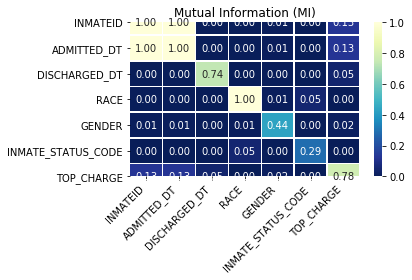

In [19]:
Utils.normal_process(inmate)